In [1]:
import numpy as np

import matplotlib.pyplot as plt

from keras.layers import Conv2D, Input, Dense, Dropout, MaxPool2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist, cifar10

%matplotlib inline

In [2]:
(train, _), (test, _) = mnist.load_data()

# scaling input data
train = train.reshape([-1,28,28,1]) / 255
test = test.reshape([-1,28,28,1]) / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Adding Noise

In [3]:
# Adding noise to data
noise = 0.3
train_noise = train + noise * np.random.normal(0, 1, size=train.shape)
test_noise = test + noise * np.random.normal(0, 1, size=test.shape)

train_noise = np.clip(train_noise, 0, 1)
test_noise = np.clip(test_noise, 0, 1)

### Visualise Training data

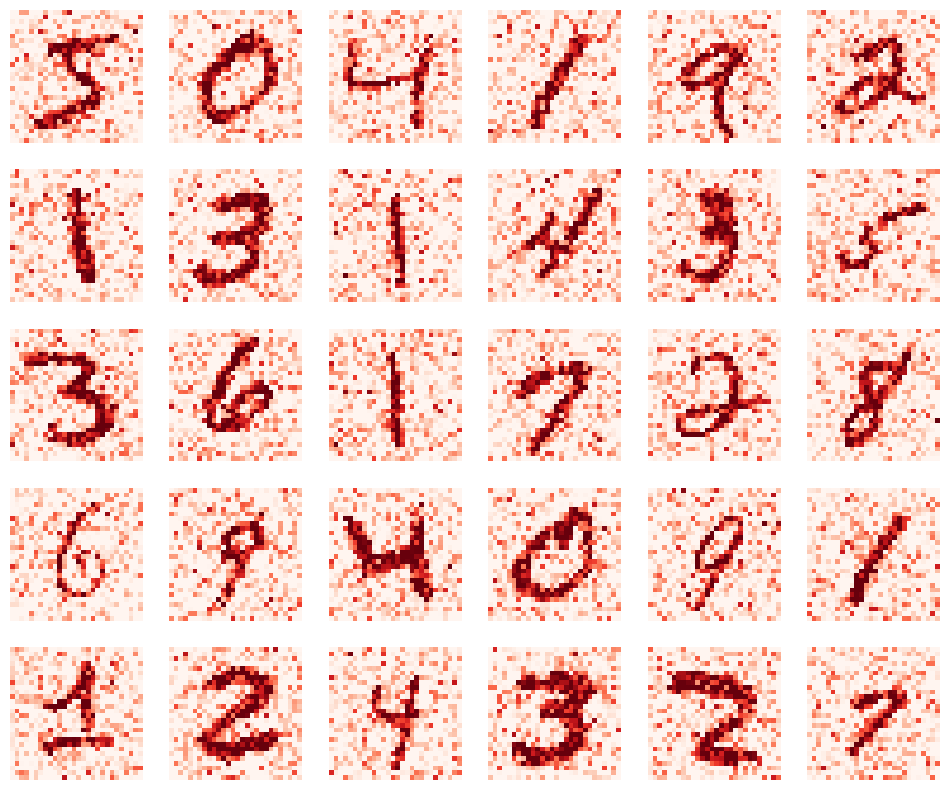

In [4]:
# sample noisy image

rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure
subplot_size = 2

f = plt.figure(figsize=(subplot_size*cols,subplot_size*rows)) # defining a figure

for i in range(rows*cols):
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(train_noise[i].reshape([28,28]),cmap="Reds")
    plt.axis("off")
plt.savefig("digits_noise.png")

### Original Images

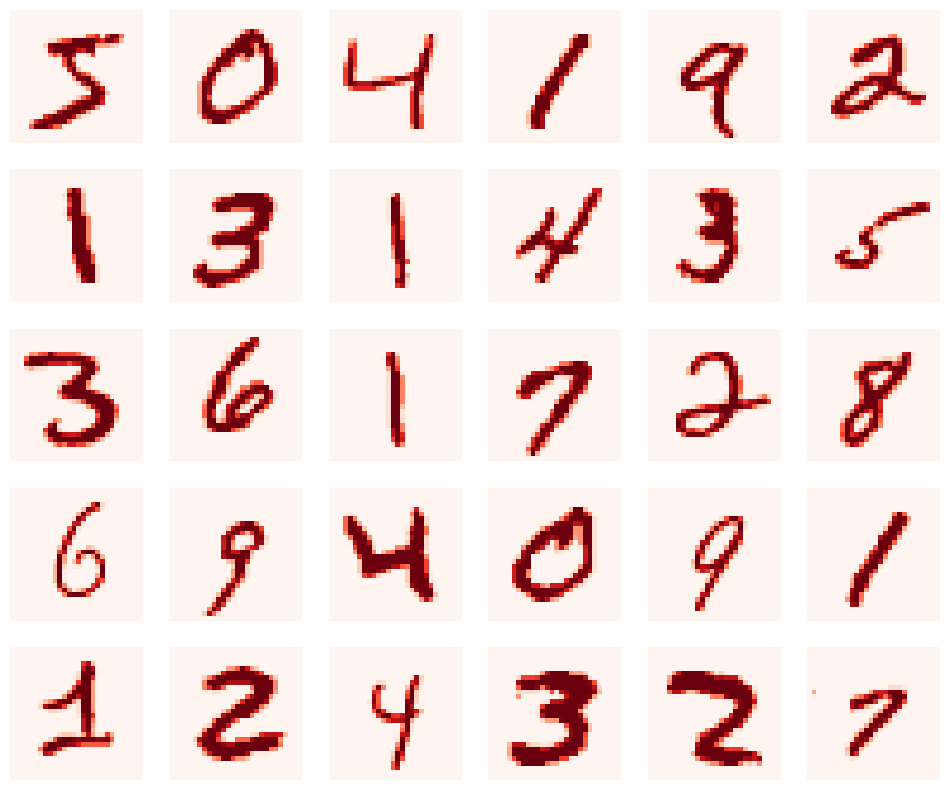

In [6]:
# sample original image

rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure
subplot_size = 2
f = plt.figure(figsize=(subplot_size*cols, subplot_size*rows)) # defining a figure

for i in range(rows*cols):
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(train[i].reshape([28,28]),cmap="Reds")
    plt.axis("off")
plt.savefig("digits_original.png")

### Autoencoder Model

In [7]:
# Encoder
inputs = Input(shape=(28,28,1))

x = Conv2D(32, 3, activation='relu', padding='same')(inputs)
x = MaxPool2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
encoded = MaxPool2D()(x)

In [8]:
# Decoder

x = Conv2D(32, 3, activation='relu', padding='same')(encoded)
x = UpSampling2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
x = UpSampling2D()(x)
decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)

### Create and compile model

In [9]:
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

### Training

In [11]:
epochs = 1
batch_size = 256

history = autoencoder.fit(train_noise,
                train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(test_noise, test)
               )

235/235 ━━━━━━━━━━━━━━━━━━━━ 137s 584ms/step - loss: 0.1115 - val_loss: 0.0975


### Visualise Results

In [15]:
# # Defining Figure
# f = plt.figure(figsize=(10,7))
# f.add_subplot()

# #Adding Subplot
# plt.plot(history.epoch, history.history['loss'], label = "loss") # Loss curve for training set
# plt.plot(history.epoch, history.history['val_loss'], label = "val_loss") # Loss curve for validation set

# plt.title("Loss Curve",fontsize=18)
# plt.xlabel("Epochs",fontsize=15)
# plt.ylabel("Loss",fontsize=15)
# plt.grid(alpha=0.3)
# plt.legend()
# plt.savefig("Loss_curve.png")
# plt.show()

### Sample few test images

In [13]:
# Select few random test images
num_imgs = 16
rand = np.random.randint(1, 100)

test_images = test_noise[rand:rand+num_imgs] # slicing
test_desoided = autoencoder.predict(test_images) # predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


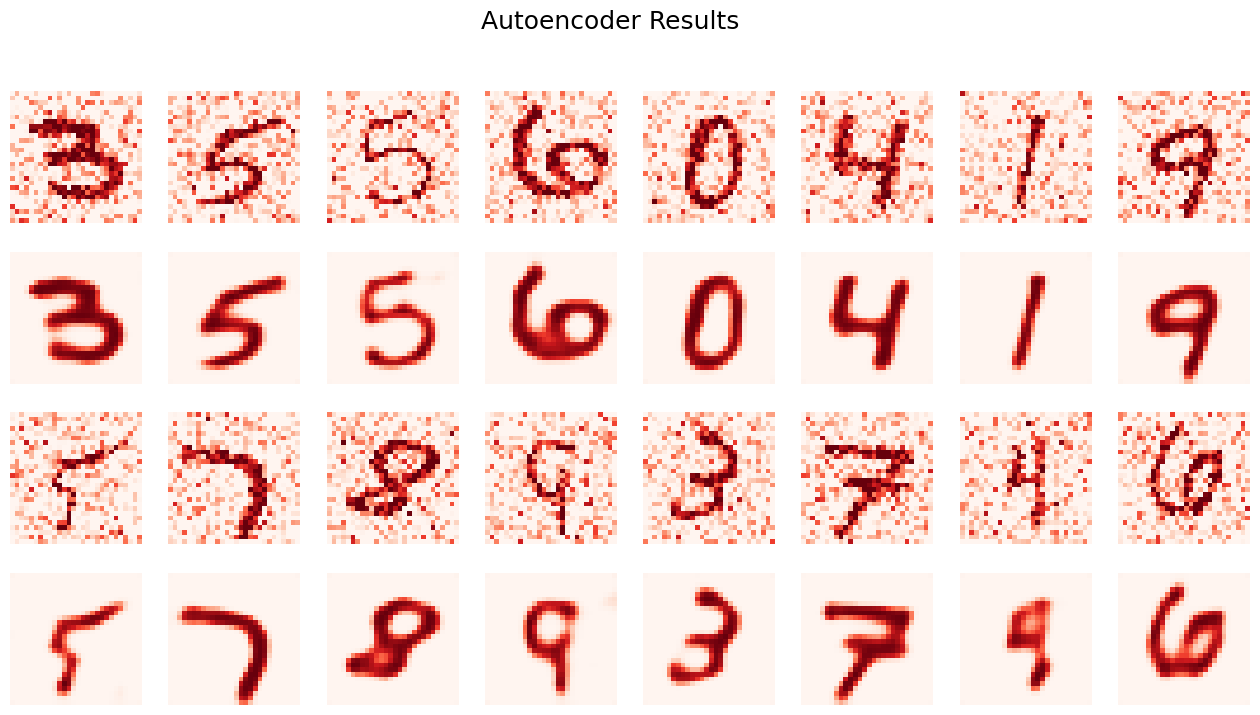

In [14]:
# Visualize test images with their denoised images

rows = 2 # defining no. of rows in figure
cols = 8 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows*2)) # defining a figure

for i in range(rows):
    for j in range(cols):
        f.add_subplot(rows*2,cols, (2*i*cols)+(j+1)) # adding sub plot to figure on each iteration
        plt.imshow(test_images[i*cols + j].reshape([28,28]),cmap="Reds")
        plt.axis("off")

    for j in range(cols):
        f.add_subplot(rows*2,cols,((2*i+1)*cols)+(j+1)) # adding sub plot to figure on each iteration
        plt.imshow(test_desoided[i*cols + j].reshape([28,28]),cmap="Reds")
        plt.axis("off")

f.suptitle("Autoencoder Results",fontsize=18)
plt.savefig("test_results.png")

plt.show()